# <h1><center>Sentiment Analysis for Foody&Foodie<h1><center>
![food_image](images/food_image.jpeg)

   
by team: Grilled tacos 
*  Joseph Hinga
*  Joan Nyamache
*  Eugene Marius
* George Kariuki
* SAMUEL Gichuru

## Business Understanding

### Overview
Foody&Foodie are a family run restaurant in San francisco, CA. As a veteran in the food business they understand that they will need to keep track of sentiments from their customer base to maintain a competitive edge in the market.


### Problem Statement
The management of Foody&Foodie understand the need to find reliable feedback to guide their decision-making aiming to improve their business and match their markets ever changing needs. 


### Challenges
Within the Food industry, they're several measurable parameters to that determine the success of a restaurant and we must find a neutral data set where all these aspects can be fairly evaluated for an accurate result.

### Proposed solution
We will need to create a model to analyze customer sentiments through reviews on restaurants within the target area using a single popular review site, Yelp, to pull the relevant data as it is the most comprehensive compilation of reviews in the target market.



### Objectives
#### Main Objective
- To create a model that could successfully predict the sentiment of a customer’s review. The model would attain a recall score and accuracy score above 80%

#### Specific Objective
- To identify the most common words used in the dataset using a Word cloud.
- To confirm the most common words that are positively and negatively tagged.
- To recognize the products that have been opined by the customers.
- To spot the distribution of the sentiments.



### Workplan

1. Loading the Dataset: Import the review dataset

2. Data Understanding: Analyze the dataset's structure and content.

3. Target Variable Identification: Select key variables for analysis.

4. Data Preparation: Clean the data, and ensure data integrity.

5. Encoding Categorical Variables: Convert categorical data for modeling.

6. Model Evaluation: Evaluate model performance using appropriate metrics.

7. Deployment: Forecast food reviews using trained models.

8. Insights and Conclusions: Provide actionable insights and recommendations based on our findings.













## Data Understanding
Our dataset is a compilation of writen reviews, ratings, review IDs, review date and business IDs from the Yelp website. The compilation of this data allows us to clearly identfy positive and negatve sentiments in relation to a rating given on a scale of 1-5 as well as reactions to the sentiment by readers categorized as cool, useful or funny. 
Post cleaning the data, these are the metrics we will use to isolate and model a collective non biased scale of opinions on restarunts in the area.

The dataset for this analysis is sourced from Yelp and contains detailed food reviews. It encompasses a total of 429,771 rows and 8 columns, structured in a wide format.

Dataset Overview:

1. Source: Yelp Website
2. Total Rows:429,771
3. Total Columns: 8
4. Column Details:

    * ***Review_id***: A unique identifier assigned to each review. _Data Type: Integer (object)_

    * ***User_ID*** : A unique identifier assigned to each user. _Data Type: Integer (object)_

    * ***Business_id*** : A unique identifier assigned to each Business. _Data Type: String (object)_

    * ***Stars***: The ratings of reviews. _Data Type: String (int64)_

    * ***Useful***: Categorization of the review. _Data Type: String (int64)_

    * ***Fuuny***: Categorization of the review. _Data Type: String (int64)_

    * ***Cool***: Categorization of the review. _Data Type: Integer (int64)_

    * ***Text***: The review. _Data Type: Float (float64)_

    * ***Date***: Date when the review was written. _Data Type: Integer (float64)_


In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to C:\Users\PROBOOK
[nltk_data]     6460\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Loading Data 

In [2]:
# Load restaurant data - This also works
df = pd.read_csv("data.zip")

### Data Preparation

In [3]:
# Top 5 Rows
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,iBUJvIOkToh2ZECVNq5PDg,iAD32p6h32eKDVxsPHSRHA,YB26JvvGS2LgkxEKOObSAw,5,0,0,0,I've been eating at this restaurant for over 5...,2021-01-08 01:49:36
1,HgEofz6qEQqKYPT7YLA34w,rYvWv-Ny16b1lMcw1IP7JQ,jfIwOEXcVRyhZjM4ISOh4g,1,0,0,0,How does a delivery person from here get lost ...,2021-01-02 00:19:00
2,Kxo5d6EOnOE-vERwQf2a1w,2ntnbUia9Bna62W0fqNcxg,S-VD26LE_LeJNx5nASk_pw,5,0,0,0,"The service is always good, the employees are ...",2021-01-26 18:01:45
3,STqHwh6xd05bgS6FoAgRqw,j4qNLF-VNRF2DwBkUENW-w,yE1raqkLX7OZsjmX3qKIKg,5,0,0,0,two words: whipped. feta. \nexplosion of amazi...,2021-01-27 23:28:03
4,u0smrr16uVQ8pgSEseXcKg,H3P9EB7J9HP6PzkVjgFiOg,oQ5CPRt0R3AzFvcjNOqB1w,5,0,0,0,So day 2 in Nashville. I gotta get some BBQ. M...,2021-03-17 20:09:00


In [4]:
# Bottom 5 Rows
df.tail()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
429766,A5uNiAOGcU0M34sSGN6Wkg,JWhZs-vSggwN6WgxBHgIDw,B2xtWMBTyDtd-ndqqaIC1Q,1,0,0,0,Sat at the bar for 10 minutes and didn't get s...,2022-01-15 15:41:15
429767,1ryZLb9pSBz0y66tHB-rfw,XJTO9x78TgWE94cmXqNduA,c3QxX3toWdqJnKQmmIliRQ,1,1,2,0,"The supper club is ridiculously expensive. So,...",2021-11-29 18:26:40
429768,PVRvzY0NxSU-fiK3JOXX7w,cTozFTTWjlFYc3yusdbZmA,uMVOtr16r1ELu46pWr4HCQ,1,0,0,0,Just average Thai food tonight. Bangkok has al...,2022-01-18 06:42:59
429769,wD5ZWao_vjyT2h4xmGam8Q,7L7GL5Pi2cf8mbm2Dpw4zw,e_E-jq9mwm7wk75k7Yi-Xw,5,1,0,1,It is very rare for a restaurant to be this go...,2022-01-17 22:36:01
429770,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5,1,0,0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27


In [5]:
# No of Columns
df.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [6]:
# Columns, No. of null items, and Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429771 entries, 0 to 429770
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_id    429771 non-null  object
 1   user_id      429771 non-null  object
 2   business_id  429771 non-null  object
 3   stars        429771 non-null  int64 
 4   useful       429771 non-null  int64 
 5   funny        429771 non-null  int64 
 6   cool         429771 non-null  int64 
 7   text         429771 non-null  object
 8   date         429771 non-null  object
dtypes: int64(4), object(5)
memory usage: 29.5+ MB


In [7]:
# Statistical Summary of the data
df.describe()

,stars,useful,funny,cool
count,429771.000000,429771.000000,429771.000000,429771.000000
mean,3.820449,0.822806,0.212450,0.487885
std,1.513978,2.818655,1.231838,2.382432
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000
max,5.000000,261.000000,101.000000,164.000000


##### ***Observation***
We loaded a dataset of 429,771 restaurant reviews and examined its structure by viewing the first and last few rows, checking the column names, data types, and memory usage. This gave us a clear understanding of the data's content and format, helping us identify any necessary preprocessing steps for further analysis.

---

## Data Cleaning

### ***Validity***

In [8]:
# Drop irrelevant columns
df = df.drop(columns=['review_id', 'user_id', 'business_id'])

### ***Consistency***


In [9]:
# Removing duplicates rows
df.drop_duplicates(inplace=True)

In [10]:
# Check for missing values
df.isnull().sum()

df.dropna(inplace=True)

### ***Completeness***


In [11]:
# Handling missing values

# Convert non-string values to strings, filling NaNs with an empty string
df['text'] = df['text'].fillna('').astype(str)

# Calculate the length of each text entry
df['text_Length'] = df['text'].apply(len)

# Display summary statistics of the text lengths
print(df['text_Length'].describe())

count    429771.000000
mean        477.570871
std         441.488873
min           1.000000
25%         194.000000
50%         340.000000
75%         602.000000
max        5000.000000
Name: text_Length, dtype: float64


### ***Feature Engineering***

In [12]:
# Define a function to categorize reviews
def categorize_review(stars):
    if stars >= 4:
        return 'positive'
    elif stars == 3:
        return 'neutral'
    else:
        return 'negative'

# Apply the function to create a new column
df['review_category'] = df['stars'].apply(categorize_review)

# Display the DataFrame with the new column
df.head(2)

,stars,useful,funny,cool,text,date,text_Length,review_category
0,5,0,0,0,I've been eating at this restaurant for over 5...,2021-01-08 01:49:36,404,positive
1,1,0,0,0,How does a delivery person from here get lost ...,2021-01-02 00:19:00,315,negative


##### ***Observation***

We cleaned and preprocessed the dataset by:

- Dropping unnecessary columns and duplicate rows.
- Handling missing values by either removing rows or filling them appropriately.
- Calculating the length of each text review.
- Categorizing reviews into positive, neutral, or negative based on star ratings.

---

## Data Preprocessing

In [13]:
# Convert all text to lowercase
df['text'] = df['text'].str.lower()

In [14]:
# Remove punctuation
df['text'] = df['text'].apply(lambda x: re.sub(f"[{string.punctuation}]", "", x))

In [15]:
# Remove numbers
df['text'] = df['text'].apply(lambda x: re.sub(r'\d+', '', x))

In [16]:
# Define stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

##### ***Comments***

In this data preprocessing task, We cleaned and prepared restaurant review text data for analysis by:

- Converting all text to lowercase to ensure uniformity.
- Removing punctuation, numbers, and common stopwords to reduce noise.
- Lemmatizing words to reduce them to their root forms, simplifying the text.
- Saving the cleaned data back to the original file for future analysis.

___

## Exploratory Data Analysis (EDA) ##

### ***Word Cloud Visualization***

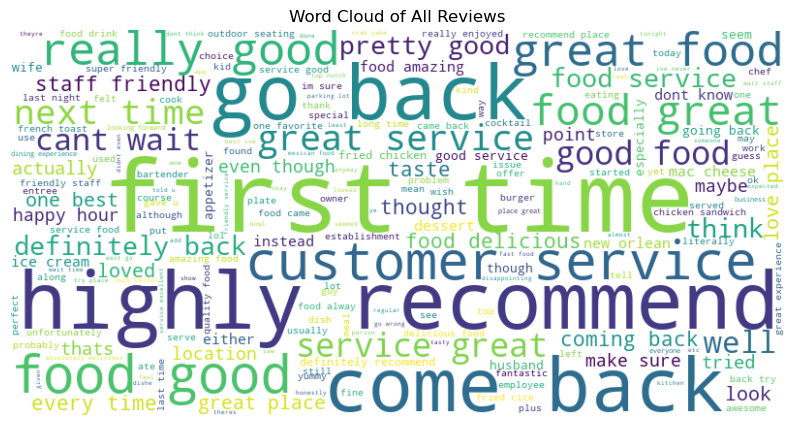

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud for the entire dataset
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title)
    plt.show()

all_reviews = ' '.join(df['text'].dropna())
generate_wordcloud(all_reviews, 'Word Cloud of All Reviews')

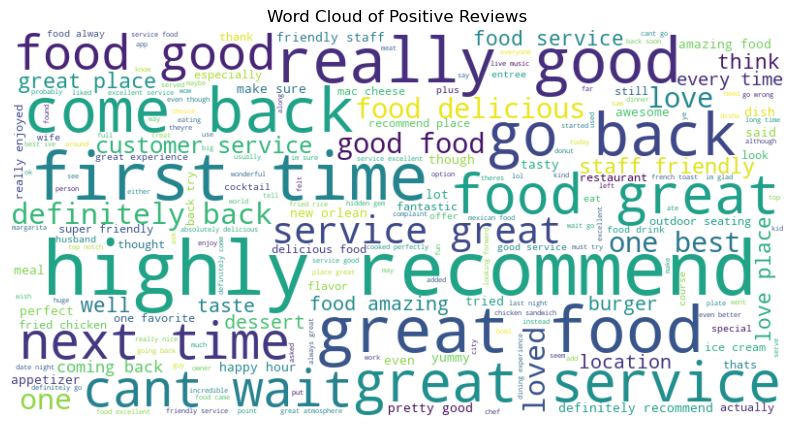

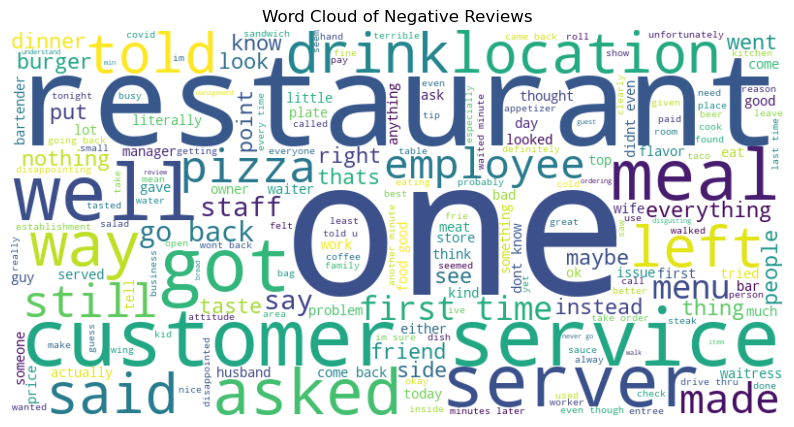

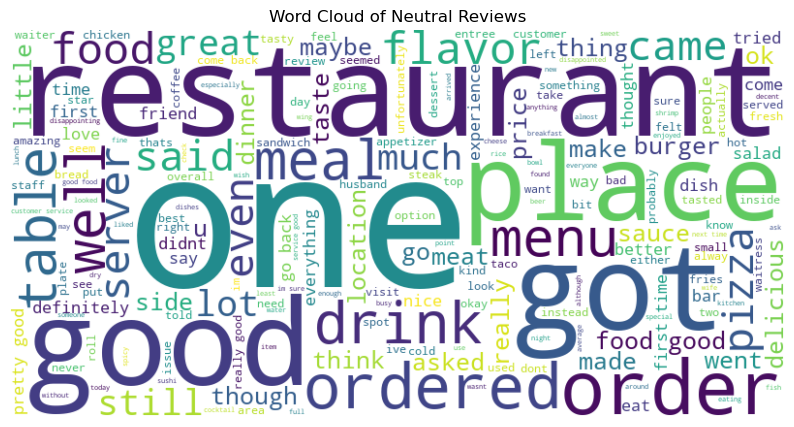

In [20]:
# Generate separate word clouds for positive, negative and neutral sentiments if labeled
sentiments = {'positive': 'Positive', 'negative': 'Negative', "neutral":"Neutral"}
for sentiment, label in sentiments.items():
    reviews = ' '.join(df[df['review_category'] == sentiment]['text'].dropna())
    if reviews:
        generate_wordcloud(reviews, f'Word Cloud of {label.title()} Reviews')
    else:
        print(f"No {label.lower()} reviews available for the word cloud.")

##### ***Observations***
>The word cloud suggests that customers generally have a positive experience, with "_food and service_" being the primary factors influencing their satisfaction. Other words highlighted by the positive wod cloud include _"good, great, highly, recommend, cant, wait"_

> The negative word cloud highlights words such as _customer, service, employee, server, one_

> The neutral word cloud implies that the words were a mix of both the positive and negative words

### ***Distribution of Review Lengths***

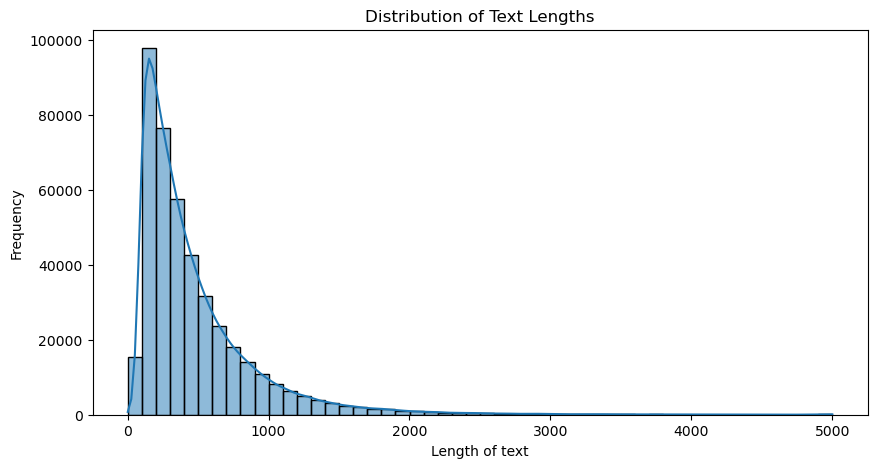

In [20]:
# Plot the distribution of review lengths
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(df['text_Length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Length of text')
plt.ylabel('Frequency')
plt.show()

The majority of short reviews suggest users prefer brief comments, suggesting businesses should focus on concise messaging. The content may include quick impressions or detailed experiences, offering insights into customer satisfaction. Data analysis should consider skewness and median word count.

### ***Distribution of Star Ratings***

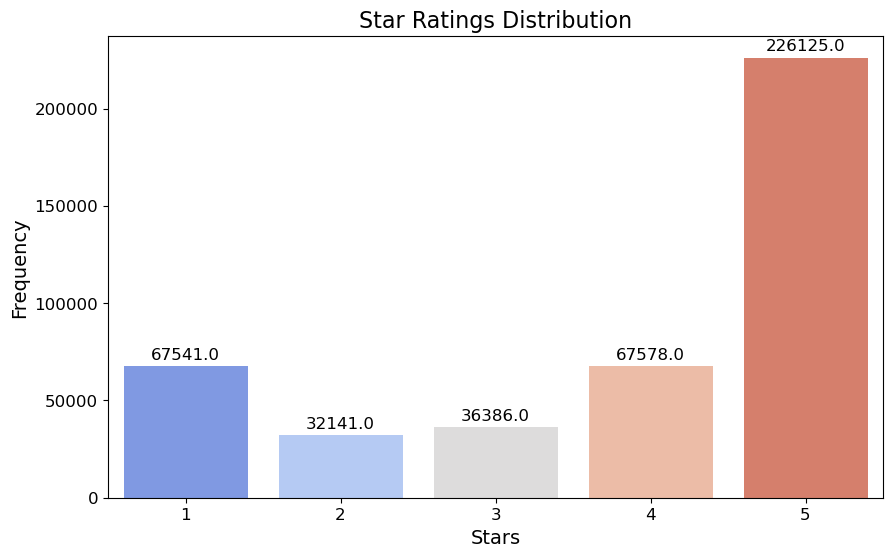

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_star_distribution(df, palette='Blues', title='Distribution of Star Ratings', xlabel='Star Ratings', ylabel='Count'):
    """
    Plots the distribution of star ratings with customizations.
    
    :param df: DataFrame containing the data
    :param palette: Color palette for the bars
    :param title: Title of the plot
    :param xlabel: Label for the x-axis
    :param ylabel: Label for the y-axis
    """
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x='stars', data=df, palette=palette)
    
    # Add annotations to the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                    textcoords='offset points')

    # Customizing the plot
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# usage with custom parameters
plot_star_distribution(df, palette='coolwarm', title='Star Ratings Distribution', xlabel='Stars', ylabel='Frequency')


##### ***Observations***

The high number of 5-star reviews on Yelp may make it challenging to distinguish outstanding businesses from average ones due to the skewed nature of ratings. Additionally, Yelp reviewers may be more motivated to leave a review after a positive experience.

### ***Distribution of "Cool", "Useful", and "Funny" Votes***

In [47]:
# Helper function
def plot_countplot(column):    
    """This plots out the countplot of a numerical feature"""
    plt.figure(figsize=(10,6))
    sns.countplot(x=column, data=df)
    plt.xlim(0, 10)
    plt.title(f"Distribution of {column.title()} feature")
    plt.show()

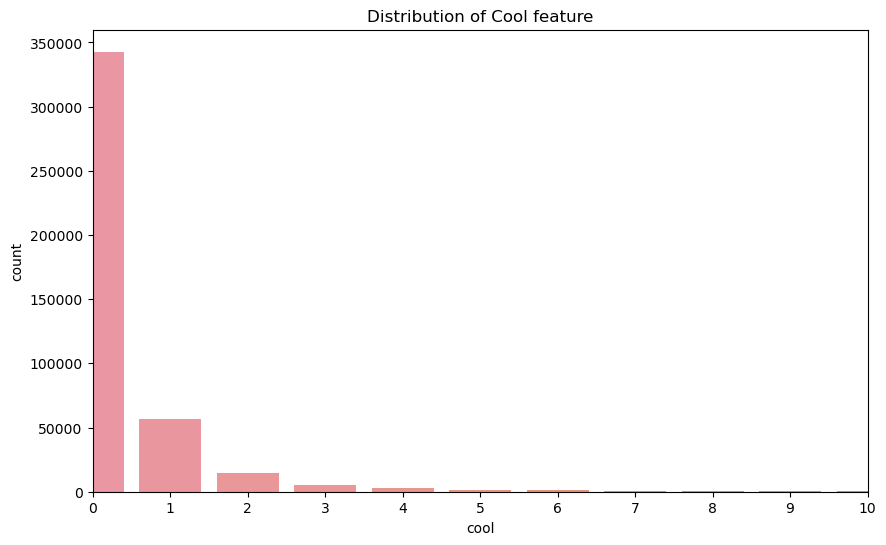

In [48]:
plot_countplot(column="cool")

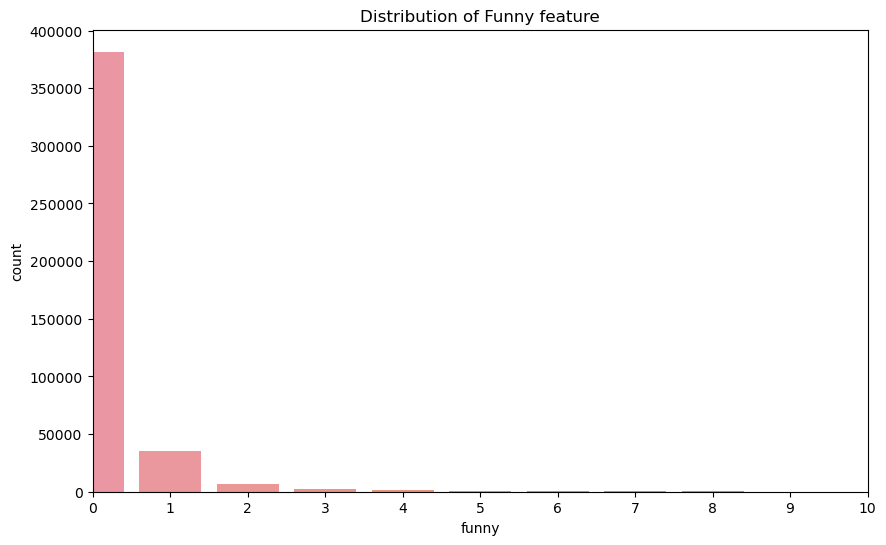

In [49]:
plot_countplot(column="funny")

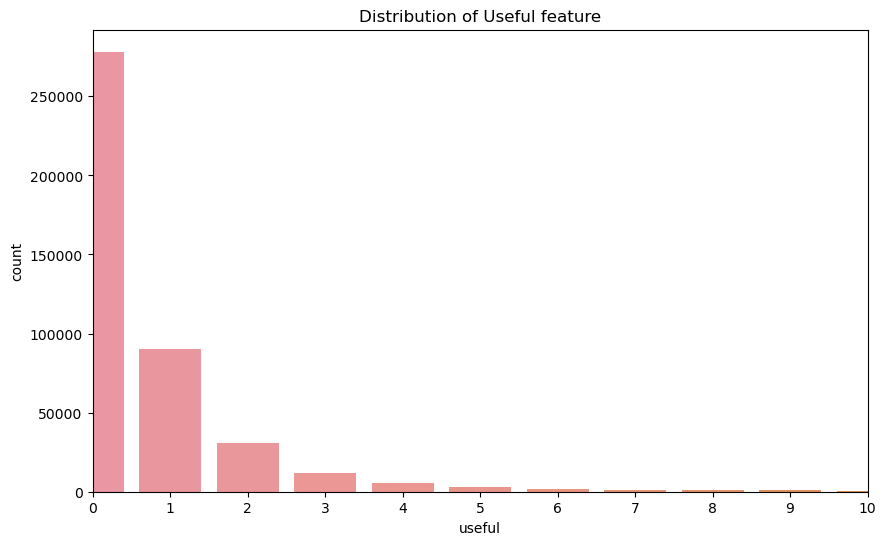

In [50]:
plot_countplot("useful")

##### ***Observation***
The `cool, funny and useful` columns all share a high 0 value meaning the review was not relevant in any of the 3 aspects required. There is a sharp decline in the ratings afterwards.

 ### ***Top Most Frequent Words***

Lets dentify the most frequent words that can help understand common themes in the dataset.

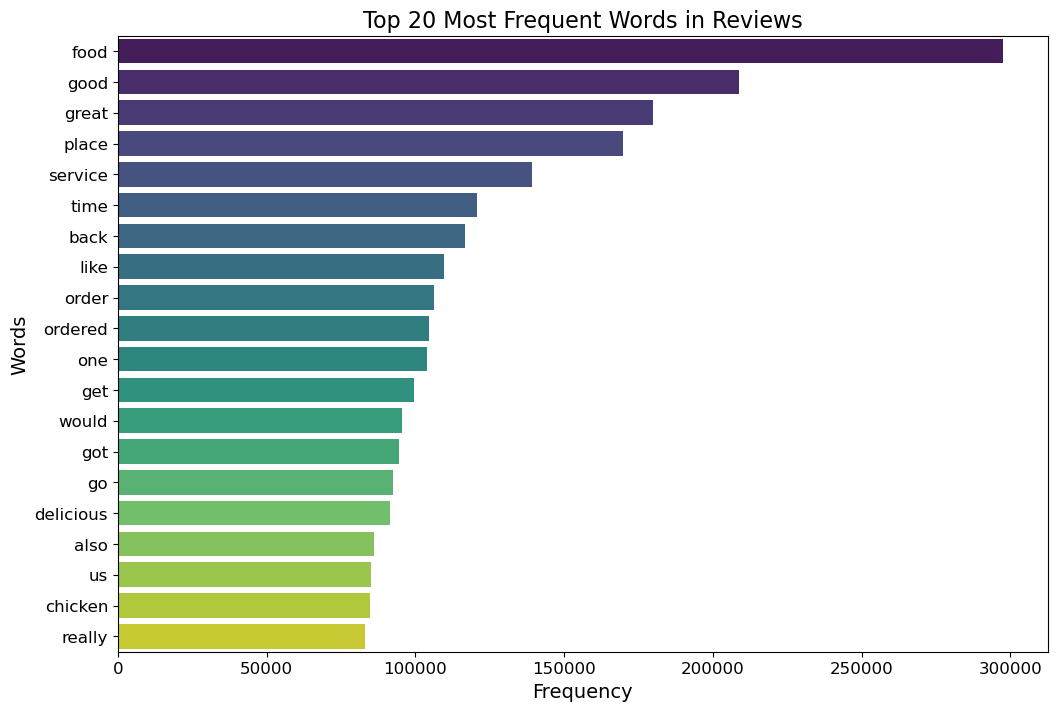

In [27]:
# Tokenize and clean text, handling non-string entries
def tokenize_and_clean(text):
    if isinstance(text, str):  # Check if the entry is a string
        text = text.lower()  # Convert text to lowercase
        tokens = word_tokenize(text)  # Tokenize the text
        cleaned_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]  # Remove stopwords and non-alphanumeric tokens
        return cleaned_tokens
    else:
        return []  # Return an empty list for non-string entries

# Apply the function to the 'text' column
df['Tokens'] = df['text'].apply(tokenize_and_clean)

# Flatten the list of all tokens from all reviews into a single list
all_words = [word for tokens in df['Tokens'] for word in tokens]

# Create a frequency distribution of the words
word_freq = Counter(all_words)

# Select the top N most common words
top_n = 20  # Adjust this to plot more or fewer words
common_words = word_freq.most_common(top_n)

# Unzip the words and their counts for plotting
words, counts = zip(*common_words)

# Create a DataFrame specifically for plotting
df_plot = pd.DataFrame({'Word': words, 'Frequency': counts})

# Plot the top N most frequent words using Seaborn for visualization
plt.figure(figsize=(12, 8))  # Increase the size for better readability
sns.barplot(x='Frequency', y='Word', data=df_plot, palette='viridis')
plt.title(f'Top {top_n} Most Frequent Words in Reviews', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


##### ***Observation***
The words with the highest frequency include "food", "good" and "great" that occured over 150000 in the corpus.

## Distribution of Review Category

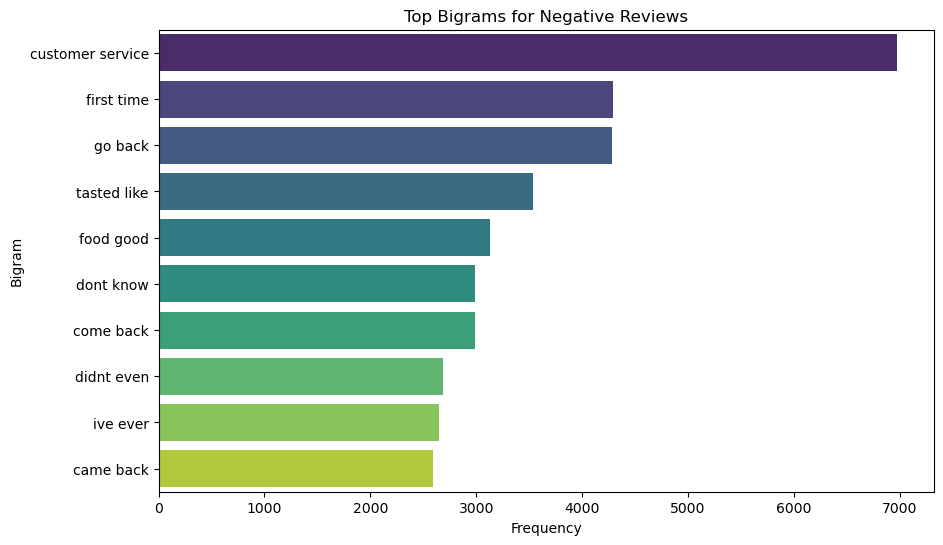

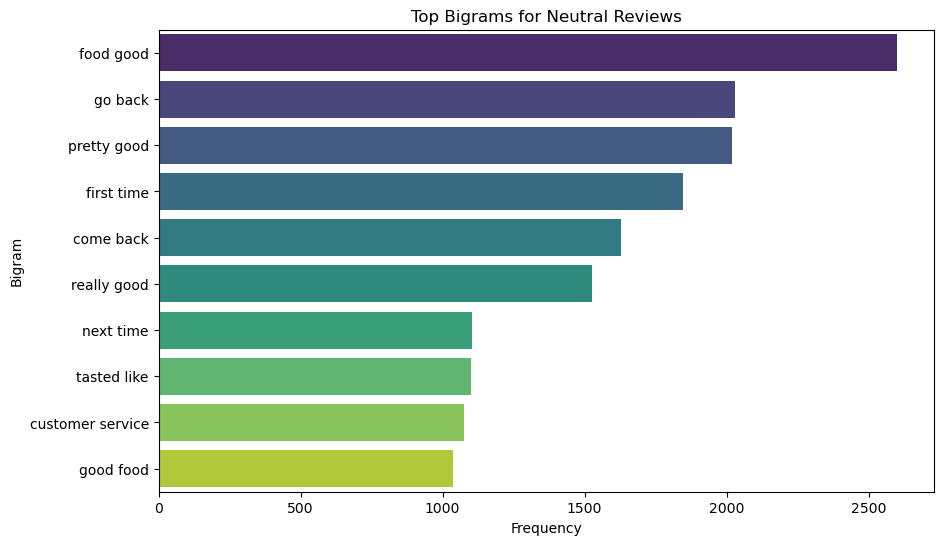

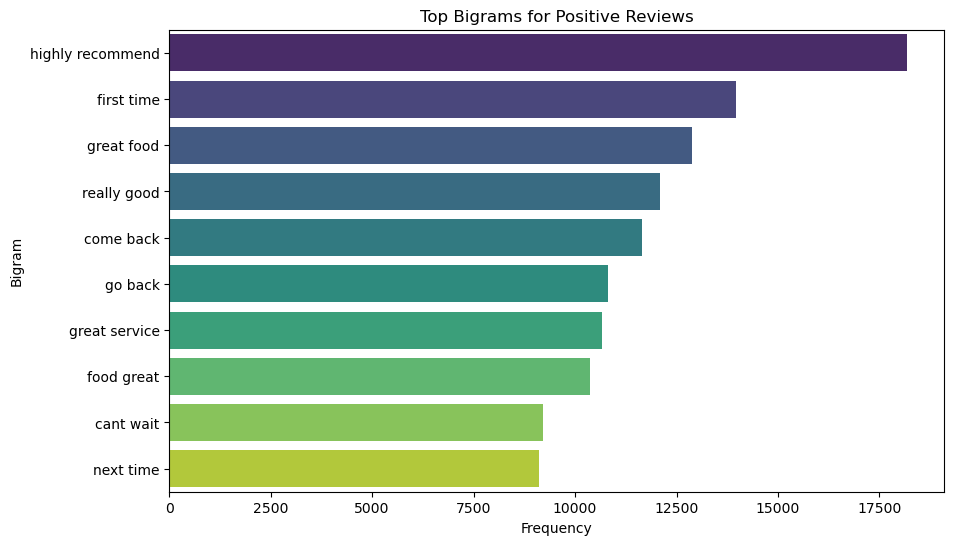

In [51]:
from nltk import bigrams, FreqDist

# Function to extract bigrams from text
def extract_bigrams(text):
    tokens = word_tokenize(text.lower())
    return list(bigrams(tokens))

df['text'] = df['text'].fillna('')

# Generate bigrams for each review category
bigrams_by_category = df.groupby('review_category')['text']\
                        .apply(lambda texts: [bigram for text in texts for bigram in extract_bigrams(text)])

# Count bigrams and plot
for category, bigram_list in bigrams_by_category.items():
    freq_dist = FreqDist(bigram_list)
    most_common_bigrams = freq_dist.most_common(10)  # Adjust number of bigrams to show
    
    # Convert to DataFrame for plotting
    bigram_df = pd.DataFrame(most_common_bigrams, columns=['Bigram', 'Frequency'])
    bigram_df['Bigram'] = bigram_df['Bigram'].apply(lambda x: ' '.join(x))
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Bigram', data=bigram_df, palette='viridis')
    plt.title(f'Top Bigrams for {category.title()} Reviews')
    plt.xlabel('Frequency')
    plt.ylabel('Bigram')

    plt.show()



### ***Distribution of Review Categories***

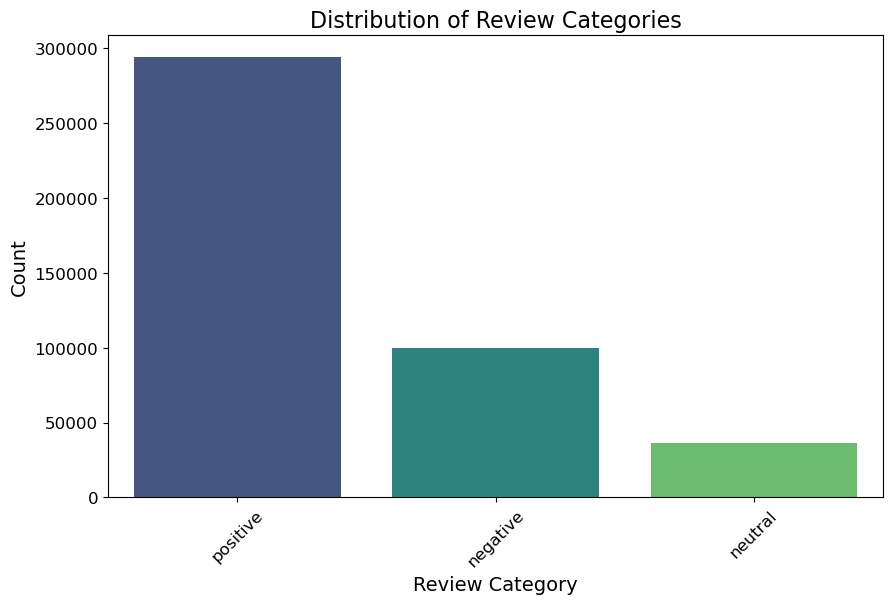

In [29]:
# Calculate the distribution of review categories
category_counts = df['review_category'].value_counts()

# Create a bar plot to visualize the distribution of review categories
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xlabel('Review Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Review Categories', fontsize=16)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.show()


##### ***Observation***

* Negative Reviews: Customer service is the most frequently mentioned area for improvement in negative reviews. This suggests a need to address potential issues in customer service training or procedures.

* Neutral Reviews: Food quality appears to be the primary focus in neutral reviews. While this isn't necessarily bad, it indicates a lack of strong opinions about other aspects like service or atmosphere.

* Positive Reviews: Customers express satisfaction with both service and food in positive reviews, often recommending the establishment to others. This highlights the positive aspects of the dining experience.

### ***Correlation Analysis***

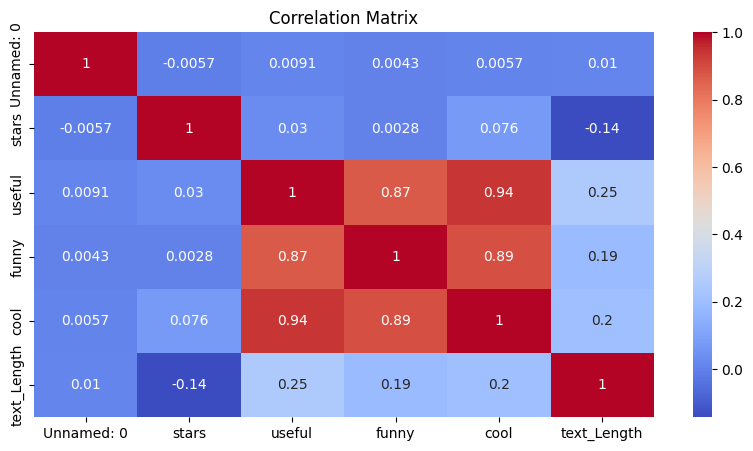

In [ ]:
# Filter the DataFrame to include only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Check if there are any numeric columns
if numeric_df.shape[1] > 0:
    plt.figure(figsize=(10, 5))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("No numeric columns to plot.")



##### ***Observation***

<b>High Positive Correlation</b>:

There's a strong positive correlation between `useful`, `funny`, and `cool` votes. This suggests that if a review gets one of these votes, it's likely to receive the others as well.

<b>Low Positive Correlation</b>:
There is a very low positive correlation between `stars` and `useful`, `funny`, and `cool` votes.
`text_length` has a weak correlation with the other variables, suggesting that the length of a review doesn't significantly impact the type of votes it receives.

# MODELLING

## Data Preprocessing

The data preprocessing steps taken for this project included:

1. Splitting the data between the target and features
2. Label Encoding the target
3. Vectorising the data using TFIDF Vectoriser
4. Using SMOTE to avoid bias in the data
5. Split the data using Train-Test Split of 80-20

Additionally the models in the modelling section include:
1. Logistic Regression
2. Random Forest Classifier
3. Linear Support Vector Machine
4. Multinomial Bayes
5. Decision Trees Classifier

In [ ]:
# Section Imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Model Imports
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier

In [15]:
# The X and Target
X = df['text']
y = df['review_category']

# Label Encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)
target_classes = le.classes_
print(target_classes)

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(df["text"])
X_vec = pd.DataFrame.sparse.from_spmatrix(X_vec)
X_vec.columns = sorted(vectorizer.vocabulary_)
X_vec.set_index(y.index, inplace=True)

# SMOTE
sm = SMOTE(random_state=42)
X_tf_smote, y_tf_smote = sm.fit_resample(X_vec, y_encoded)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_tf_smote, y_tf_smote, test_size=0.2, random_state=42)

['negative' 'neutral' 'positive']


***Helper Functions***

In [26]:
def modelling(model, name):
  """This func models the data """
  # Build and train the model
  model.fit(X_train, y_train)

  # Predict and evaluate
  y_pred = model.predict(X_test)
  print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))

In [17]:
def hyper_tuning(model, params, name):
  """This func hyper-parameter tunes each model according to specified parameters."""
  # Perform Grid Search
  grid_search = GridSearchCV(model, params, cv=5, verbose=2, scoring="accuracy")
  grid_search.fit(X_train, y_train)

  # Best parameters and score
  print(f"\nBest parameters: {grid_search.best_params_}")
  print(f"Best cross-validation score: {grid_search.best_score_}\n")

  # Evaluate the best model on test data
  best_model = grid_search.best_estimator_
  y_pred = best_model.predict(X_test)
  print(f"{name} Best Model Classification Report:\n", classification_report(y_test, y_pred))

### Logistic Regression

In [ ]:
# Build and train the model
lr_model = LogisticRegression(max_iter=3000)

# Modelling
modelling(lr_model, name="Logistic Regression")


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     13557
           1       0.82      0.86      0.84     13954
           2       0.93      0.89      0.91     13755

    accuracy                           0.87     41266
   macro avg       0.88      0.87      0.88     41266
weighted avg       0.88      0.87      0.87     41266



#### ***Hyper-parameter Tuning***

In [ ]:
# The parameters
c_space = np.linspace(30, 32, 3)
max_iters = [2000, 3000]
solvers = ["lbfgs", "liblinear"]
lr_param_grid = { 'C': c_space, 'max_iter':max_iters }

hyper_tuning(model=lr_model, params=lr_param_grid, name="Linear Regression")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..............................C=30.0, max_iter=2000; total time= 4.2min
[CV] END ..............................C=30.0, max_iter=2000; total time= 4.2min
[CV] END ..............................C=30.0, max_iter=2000; total time= 3.6min
[CV] END ..............................C=30.0, max_iter=2000; total time= 3.6min
[CV] END ..............................C=30.0, max_iter=2000; total time= 3.7min
[CV] END ..............................C=30.0, max_iter=3000; total time= 4.3min
[CV] END ..............................C=30.0, max_iter=3000; total time= 4.4min
[CV] END ..............................C=30.0, max_iter=3000; total time= 3.6min
[CV] END ..............................C=30.0, max_iter=3000; total time= 3.7min
[CV] END ..............................C=30.0, max_iter=3000; total time= 3.7min
[CV] END ..............................C=31.0, max_iter=2000; total time= 3.5min
[CV] END ..............................C=31.0, ma

##### ***Observation***
> The Logistic Regression had a high accuracy value of 87% meeting our model expectations. The Macro Avg value of Recall was also 87%.

> Tuning the Logistic Regression model improved the scores - The Accuracy Score and the Macro Average Recall Score  improved slightly to 89%.

### Random Forest Model

In [ ]:
# Build and train the model with reduced parameters
rf_model = RandomForestClassifier(
    n_estimators=100, max_depth=10, min_samples_split=10,
    min_samples_leaf=5, random_state=42
)

# Modelling
modelling(rf_model, name="Random Forest Classifier")


Random Forest Classifier Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77     13557
           1       0.77      0.72      0.75     13954
           2       0.77      0.86      0.81     13755

    accuracy                           0.78     41266
   macro avg       0.78      0.78      0.78     41266
weighted avg       0.78      0.78      0.78     41266



#### ***Hyper-parameter Tuning***

In [18]:
rf_model = RandomForestClassifier(
    n_estimators=100, max_depth=10, min_samples_split=10,
    min_samples_leaf=5, random_state=42
)

rf_param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20]   # Maximum depth of the tree
}

hyper_tuning(model=rf_model, params=rf_param_grid, name="Random Forest Classifier")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...................max_depth=None, n_estimators=100; total time= 5.6min
[CV] END ...................max_depth=None, n_estimators=100; total time= 5.6min
[CV] END ...................max_depth=None, n_estimators=100; total time= 5.8min
[CV] END ...................max_depth=None, n_estimators=100; total time= 5.6min
[CV] END ...................max_depth=None, n_estimators=100; total time= 5.9min
[CV] END ...................max_depth=None, n_estimators=200; total time=10.8min
[CV] END ...................max_depth=None, n_estimators=200; total time=11.1min
[CV] END ...................max_depth=None, n_estimators=200; total time=11.0min
[CV] END ...................max_depth=None, n_estimators=200; total time=11.1min
[CV] END ...................max_depth=None, n_estimators=200; total time=11.4min
[CV] END .....................max_depth=10, n_estimators=100; total time=  51.2s
[CV] END .....................max_depth=10, n_est

##### ***Observation***
> The Random Forest Model had a low accuracy score of 78% and a Macro Avg Recall Score of 78%.

> Upon hyperparameter tuning, the model scores went up significantly with both the Accuracy score and the Macro Avg Recall score hitting 90%

#### Linear Support Vector Machine (SVM)

In [ ]:
# Reduce dimensionality with TruncatedSVD (like PCA for sparse data)
svd = TruncatedSVD(n_components=100)  # Adjust n_components for speed
X_train_reduced = svd.fit_transform(X_train)
X_test_reduced = svd.transform(X_test)

# Define the model
svm_model = LinearSVC()

# Train the model on reduced data
svm_model.fit(X_train_reduced, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test_reduced)
print("SVM Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


SVM Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81     13557
           1       0.75      0.69      0.72     13954
           2       0.85      0.84      0.84     13755

    accuracy                           0.79     41266
   macro avg       0.79      0.79      0.79     41266
weighted avg       0.79      0.79      0.79     41266



#### ***Hyper-parameter Tuning***

In [ ]:
# Pipeline for LinearSVC with TruncatedSVD
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('svd', TruncatedSVD()),  # Dimensionality reduction
    ('svm', LinearSVC())  # Linear SVM
])

# Define hyperparameters for Grid Search
param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # Unigrams or Bigrams
    'svd__n_components': [100, 200],  # Number of components for TruncatedSVD
    'svm__C': [0.1, 1]  # Regularization parameter for LinearSVC
}

# Perform Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Evaluate the best model on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Classification Report for the Best Model:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Best parameters: {'svd__n_components': 200, 'svm__C': 1, 'tfidf__ngram_range': (1, 2)}
Best cross-validation score: 0.8713497922776694
Classification Report for the Best Model:
               precision    recall  f1-score   support

    negative       0.79      0.87      0.83     19965
     neutral       0.56      0.07      0.13      7217
    positive       0.91      0.97      0.94     58773

    accuracy                           0.87     85955
   macro avg       0.75      0.64      0.63     85955
weighted avg       0.85      0.87      0.84     85955



##### ***Observation***
> The Support Vector Machine had a low accuracy value and a Macro Avg Recall Value of 79%.

> After Hyperparameter Tuning, the accuracy improved to 87% but the Macro Avg Recall Score decreased significantly to 64%.

### Multinomial Bayes Model (MNB)

In [ ]:
# Instantiate the MNB model
mnb = MultinomialNB()

# Modelling
modelling(mnb, name="Multinomial Bayes")

Multinomial Bayes Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.76     13557
           1       0.69      0.73      0.71     13954
           2       0.90      0.84      0.87     13755

    accuracy                           0.78     41266
   macro avg       0.79      0.78      0.78     41266
weighted avg       0.78      0.78      0.78     41266



#### ***Hyper-parameter Tuning***

In [19]:
mnb = MultinomialNB()

# Parameters
mnb_param_grid = {
    'alpha': [0.01, 0.1]
}

hyper_tuning(model=mnb, name="MultiNomial Bayes", params=mnb_param_grid)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .........................................alpha=0.01; total time=  27.6s
[CV] END .........................................alpha=0.01; total time=  28.1s
[CV] END .........................................alpha=0.01; total time=  27.0s
[CV] END .........................................alpha=0.01; total time=  27.4s
[CV] END .........................................alpha=0.01; total time=  27.4s
[CV] END ..........................................alpha=0.1; total time=  27.5s
[CV] END ..........................................alpha=0.1; total time=  27.9s
[CV] END ..........................................alpha=0.1; total time=  28.1s
[CV] END ..........................................alpha=0.1; total time=  27.7s
[CV] END ..........................................alpha=0.1; total time=  27.6s
Best parameters: {'alpha': 0.01}
Best cross-validation score: 0.7813003455757997
MultiNomial Bayes Best Model Classification Repor

##### ***Observation***
The Multinomial Bayes Model had a low accuracy value and a Macro Avg Recall Value of 78%.

Applying hyperparameter tuning to the MultiNomial Bayes Model did not lead to any significant changes in the models' scores.

### Decision Trees

In [ ]:
#  Instantiate the Decision tree model
dt = DecisionTreeClassifier(max_features=5)

# Modelling
modelling(dt, name="Decision Trees")

Decision Trees Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.79     13557
           1       0.80      0.81      0.80     13954
           2       0.79      0.73      0.76     13755

    accuracy                           0.78     41266
   macro avg       0.78      0.78      0.78     41266
weighted avg       0.78      0.78      0.78     41266



#### ***Hyper-parameter Tuning***

In [21]:
#  Instantiate the Decision tree model
dt = DecisionTreeClassifier(max_features=5)

# Parameters
dt_param_grid = {"min_samples_split":[4, 5]}

hyper_tuning(model=dt, name="Decision Trees", params=dt_param_grid)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ................................min_samples_split=4; total time=  31.8s
[CV] END ................................min_samples_split=4; total time=  31.1s
[CV] END ................................min_samples_split=4; total time=  30.5s
[CV] END ................................min_samples_split=4; total time=  31.0s
[CV] END ................................min_samples_split=4; total time=  30.6s
[CV] END ................................min_samples_split=5; total time=  30.4s
[CV] END ................................min_samples_split=5; total time=  30.9s
[CV] END ................................min_samples_split=5; total time=  31.1s
[CV] END ................................min_samples_split=5; total time=  30.3s
[CV] END ................................min_samples_split=5; total time=  30.4s
Best parameters: {'min_samples_split': 4}
Best cross-validation score: 0.7414365393855894
Decision Trees Best Model Classification

##### ***Observation***
> The Decision Tree Classifier had a low accuracy value and a Macro Avg Recall Value of 78%.

> The Decision Tree performance did not increase after the hyperparamter tuning.

## Evaluation

In [17]:
# Model Names
models = ['LogisticRegression', 'Tuned LogisticRegression',
          'Random Forest', 'Tuned Random Forest',
          'Linear SVM', 'Tuned Linear SVM',
          'Multinomial Bayes', 'Tuned MultinomialNB',
          'Decision Tree', 'Tuned Decision Tree']

# Scores
model_accuracy_scores = [0.87, 0.89, 0.78, 0.90, 0.79, 0.87, 0.78, 0.78, 0.78, 0.77]
model_recall_scores =   [0.87, 0.89, 0.78, 0.90, 0.79, 0.64, 0.78, 0.78, 0.78, 0.77]

# Creating a dictionary with model names as keys and metric scores as values
data = {
    "models": models,
    "accuracy": model_accuracy_scores,
    "recall": model_recall_scores
}

# Creating the DataFrame
evaluation_df = pd.DataFrame(data=data)

# Sort Order
evaluation_df.sort_values(by='accuracy', ascending=True, inplace=True)

# Displaying the DataFrame
print("Resuts with TF-IDF")
print(evaluation_df)

Resuts with TF-IDF
                     models  accuracy  recall
9       Tuned Decision Tree      0.77    0.77
2             Random Forest      0.78    0.78
6         Multinomial Bayes      0.78    0.78
7       Tuned MultinomialNB      0.78    0.78
8             Decision Tree      0.78    0.78
4                Linear SVM      0.79    0.79
0        LogisticRegression      0.87    0.87
5          Tuned Linear SVM      0.87    0.64
1  Tuned LogisticRegression      0.89    0.89
3       Tuned Random Forest      0.90    0.90


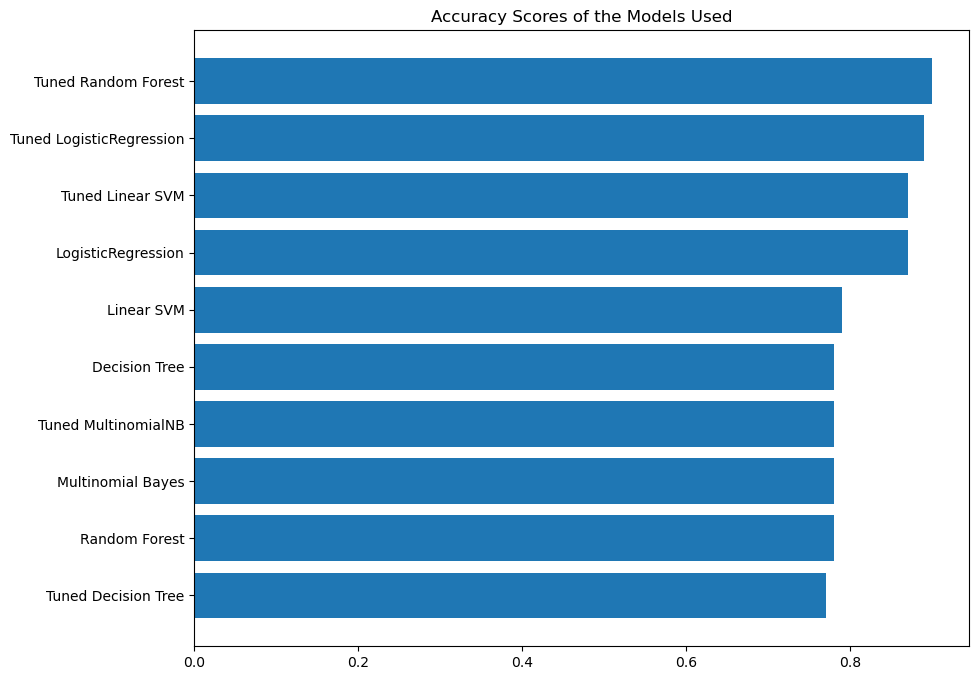

In [21]:
# Obseravtion of the Models Ran
fig = plt.figure(figsize=(10, 8))
plt.barh(y=evaluation_df['models'], width=evaluation_df['accuracy'])
plt.title("Accuracy Scores of the Models Used")
plt.show()

##### Observation
The tuned Random Forest offered both the highest accuracy score as well as the highest recall. We will use the model in our deployment.

## Deployment
To deploy effectively, we need our models and vectoriser in pickle files.

In [1]:
import pickle

In [22]:
# The data
X = df['text']
y = df['review_category']

# Label Encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)
target_classes = le.classes_
print(target_classes)

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(X)
X_vec = pd.DataFrame.sparse.from_spmatrix(X_vec)
X_vec.columns = sorted(vectorizer.vocabulary_)
X_vec.set_index(y.index, inplace=True)

# SMOTE
sm = SMOTE(random_state=42)
X_tf_smote, y_tf_smote = sm.fit_resample(X_vec, y_encoded)

# Train Test and Split - TFIDF
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf_smote, y_tf_smote, test_size=0.2, random_state=42)

# Save Vectorizer
pickle.dump(vectorizer, open('./models/vectorizer.pkl', 'wb'))

# Load the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth= None, n_estimators= 200, random_state=42)

model.fit(X_train_tf, y_train_tf)  # Sample target values

# Save the fit model
pickle.dump(model, open('./models/tuned_rf_tf_model.pkl', 'wb'))

['negative' 'neutral' 'positive']


In [24]:
# Test
# Prediction
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define stop words
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lower case
    text = text.lower()
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove punctuation and stop words, and lemmatize the tokens
    cleaned_tokens = [
        lemmatizer.lemmatize(token) 
        for token in tokens 
        if token not in string.punctuation and token not in stop_words
    ]
    
    return ' '.join(cleaned_tokens)

# Example text to be processed and predicted
text = "I had a great time hanging out at the restaurant."

# Preprocess the text
cleaned_text = preprocess_text(text)

# Transform the cleaned text to TF-IDF representation using the loaded vectorizer
text_tfidf = vectorizer.transform([cleaned_text])

# Make prediction using the loaded model
prediction = model.predict(text_tfidf)

# Return sentiment label
# print(label_encoder.classes_[prediction[0]])
prediction_labels = ['negative', 'neutral', 'positive']
prediction_labels[prediction[0]]

c:\ProgramData\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'positive'

##### ***Comment***
The pickled vectoriser and model can now be used in the deployed application.

### Conclusion & Recomendation


#### Conclusion

- Deploying the sentiment analysis model for Foody&Foodie has been a significant achievement. By categorizing reviews into negative, neutral, and positive, the model provides clear insights into customer perceptions and experiences. This structured approach helps Foody&Foodie understand specific areas that need improvement and gauge overall customer satisfaction.
- The model has effectively highlighted both key concerns and positive feedback, offering valuable data to guide strategic decisions. This data-driven approach enhances Foody&Foodie’s ability to respond to customer needs and adapt to market changes proactively.




#### Recomendation

- *Address Negative Feedback:*
Pinpoint recurring problems from negative reviews. Target improvements to enhance satisfaction.
- *Leverage Positive Feedback:*
 Promote strengths and maintain high performance.
 Recognize and reward staff with positive feedback.
- *Monitor Trends:*
 Regularly review feedback trends and adapt strategies.
 Adjust based on evolving feedback and market conditions.
- *Enhance Engagement:*
Continuously gather and understand customer feedback.
Inform customers about changes made from their feedback.